In [1]:
from tqdm import tqdm
import numpy as np
from mave_calibration.evidence_thresholds import get_tavtigian_constant, get_dual_constants
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd


In [35]:
prior_rng = np.arange(.01,1,.025)

In [65]:
CP,CB,successes = zip(*[get_dual_constants(p,return_success_count=True,C_max=100000) for p in tqdm(prior_rng)])
CP = np.array(CP)
CB = np.array(CB)
successes = np.array(successes)

In [38]:
df = pd.DataFrame({'prior':prior_rng,'CP':CP,'CB':CB,'successes':successes})

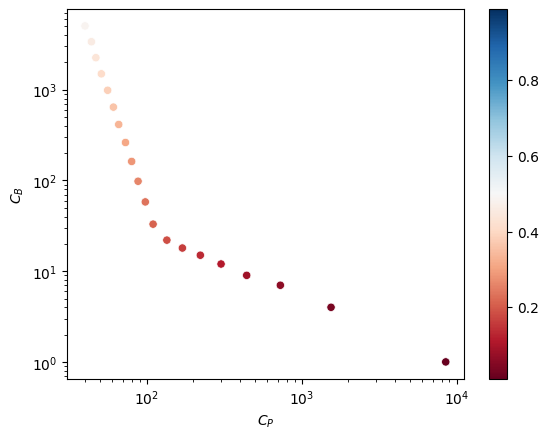

In [66]:
fig, ax = plt.subplots()

vcenter = .5
vmin, vmax = prior_rng.min(), prior_rng.max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
colormap = cm.RdBu

s=sns.scatterplot(
    y=CB[prior_rng <= .5],
    x=CP[prior_rng <= .5],
    c=prior_rng[prior_rng <= .5],
    norm=normalize,
    cmap=colormap,
    ax=ax,
)
# s=sns.scatterplot(y=CB,
#     x=CP,
#     style=successes,
#     c=prior_rng,
#     norm=normalize,
#     cmap=colormap,
#     ax=ax,
# )

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(prior_rng)
fig.colorbar(scalarmappaple,ax=ax)
plt.xlabel(r'$C_P$')
plt.ylabel(r'$C_B$')
plt.xscale('log')
plt.yscale('log')

In [2]:
def posterior(OP, prior):
    return OP * prior / ((OP-1) * prior + 1)

def OP(posterior, prior):
    return posterior * (1-prior) / ((1-posterior) * prior)

In [7]:
get_tavtigian_constant(.4) ** (-1/8)

np.float64(0.40936442013376084)

In [3]:
posterior(get_tavtigian_constant(.024) ** (-1/8), .024)

np.float64(0.009118686344516055)

In [77]:
get_tavtigian_constant(1e-10,return_success_count=False) ** (-1/8)

np.float64(1.0)

In [4]:
posterior(.38,.025)

0.009649568308786187

In [64]:
4 ** np.array([.125,.25,.5,1])

array([1.18920712, 1.41421356, 2.        , 4.        ])

In [ ]:

C,successes = zip(*[get_tavtigian_constant(p,return_success_count=True,C_max=100000) for p in tqdm(prior_rng)])

In [ ]:
import matplotlib.pyplot as plt
fig,[a,b] = plt.subplots(2,1,sharex=True)
a.plot(prior_rng, C)
a.set_xlabel('Prior')
a.set_ylabel('Tavtigian Constant')
a.set_yscale('log')
a.scatter([.0441,.1],[1124,350],c='r',label='4.41% and 10%')
a.legend()
b.scatter(prior_rng, successes)
b.set_xlabel('Prior')
b.set_ylabel('Rules Satisfied')

# plt.savefig('/data/dzeiberg/mave_calibration/tavtigian_constants.png')